Imported library

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Task 1
class i choose:
Iris Setosa and Iris Virginica

Task 2
with attributes:
sepal width and petal width

Task 3

In [2]:
dataset = pd.read_csv('iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
dataset.drop(index=dataset.index[dataset['class'] == 'Iris-versicolor'], inplace=True)
dataset.drop(['sepal length', 'petal length'] , axis='columns', inplace=True)
binary_dataset = dataset.copy()
binary_dataset.loc[dataset['class'] == 'Iris-setosa', dataset.columns == 'class'] = 0
binary_dataset.loc[dataset['class'] == 'Iris-virginica', dataset.columns == 'class'] = 1

Task 4

In [3]:
def sigma(x, w):
    activation = -1.0 * w[-1] #bias
    for i in range(len(x) - 1):
        activation += w[i] * x[i]
    return 1.0 if activation >= 0 else 0.0

def training(data, w0, mu, T):
    w = w0.copy() 
    for idx in range(T):
        for x in data:
            activation = sigma(x, w)
            error = x[-1] - activation
            w[-1] += -1.0 * mu * error

            for i in range(len(x) - 1):
                w[i] += error * x[i]
    return w

data = binary_dataset.values.tolist()
weights = [0.02, -0.03, -1.05]
#training
weights = training(data, weights, 0.2, 15)

#inference
for sample in data:
    a = sigma(sample, weights)
print(f"Final weights: {weights}")

Final weights: [-3.88, 8.270000000000001, -0.8500000000000001]


Task 5

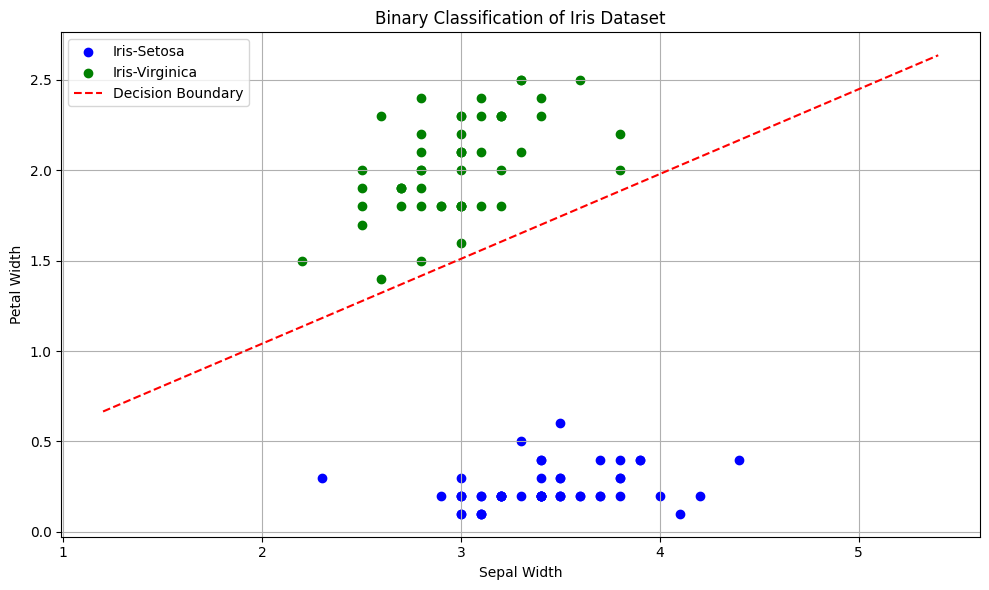

In [4]:
# Separate the data into two classes based on the 'class' label
class_0 = [sample for sample in data if sample[-1] == 0]
class_1 = [sample for sample in data if sample[-1] == 1]

# Extract sepal width and petal width for each class
sepal_width_0 = [sample[0] for sample in class_0]
petal_width_0 = [sample[1] for sample in class_0]

sepal_width_1 = [sample[0] for sample in class_1]
petal_width_1 = [sample[1] for sample in class_1]

# Create a scatter plot for both classes
plt.figure(figsize=(10, 6))
plt.scatter(sepal_width_0, petal_width_0, color='blue', marker='o', label='Iris-Setosa')
plt.scatter(sepal_width_1, petal_width_1, color='green', marker='o', label='Iris-Virginica')

# Calculate the decision boundary by w1 * x1 + w2 * x2 + bias = 0
w1, w2, bias = weights

# Define the range for sepal width (x1) based on the dataset
x_min = min([sample[0] for sample in data]) - 1
x_max = max([sample[0] for sample in data]) + 1
x_values = [x_min, x_max]

# Calculate corresponding petal width (x2) values for the decision boundary
if w2 != 0:
    y_values = [(-w1 * x - bias) / w2 for x in x_values]
    plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')
else:
    # If w2 is zero, the decision boundary is a vertical line
    x = -bias / w1
    plt.axvline(x=x, color='red', linestyle='--', label='Decision Boundary')

# Add labels and title to the plot
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Binary Classification of Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 6

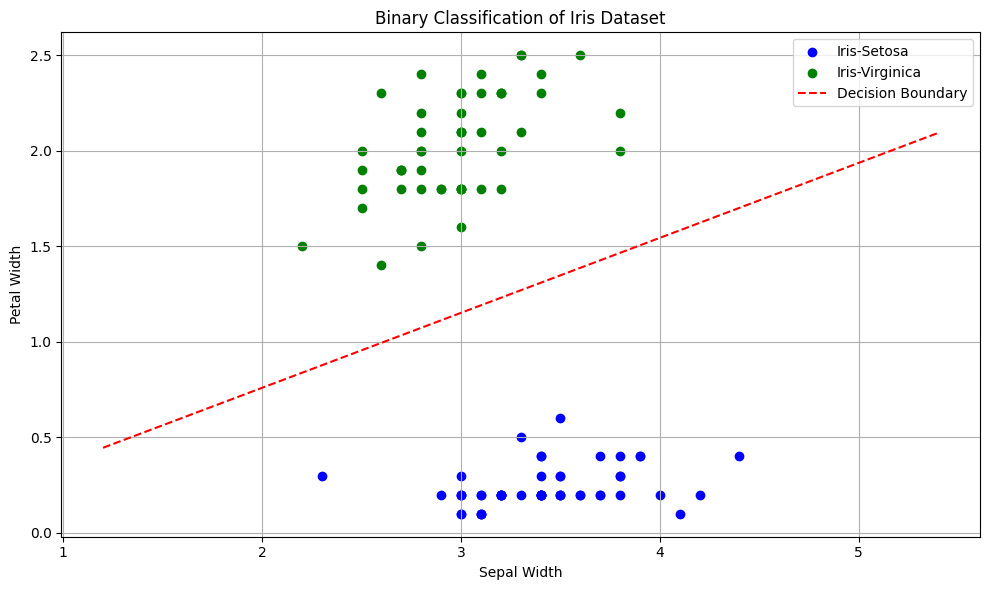

In [5]:
weights = [0.5, 1.5, 0]
#training
weights = training(data, weights, 0.2, 15)

class_0 = [sample for sample in data if sample[-1] == 0]
class_1 = [sample for sample in data if sample[-1] == 1]

sepal_width_0 = [sample[0] for sample in class_0]
petal_width_0 = [sample[1] for sample in class_0]

sepal_width_1 = [sample[0] for sample in class_1]
petal_width_1 = [sample[1] for sample in class_1]

plt.figure(figsize=(10, 6))
plt.scatter(sepal_width_0, petal_width_0, color='blue', marker='o', label='Iris-Setosa')
plt.scatter(sepal_width_1, petal_width_1, color='green', marker='o', label='Iris-Virginica')

w1, w2, bias = weights

x_min = min([sample[0] for sample in data]) - 1
x_max = max([sample[0] for sample in data]) + 1
x_values = [x_min, x_max]

if w2 != 0:
    y_values = [(-w1 * x - bias) / w2 for x in x_values]
    plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')
else:
    x = -bias / w1
    plt.axvline(x=x, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Binary Classification of Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If we change the weights, then we get a more precise split.

Task 7

(100, 2)
(100,)
SVM Accuracy:  1.0


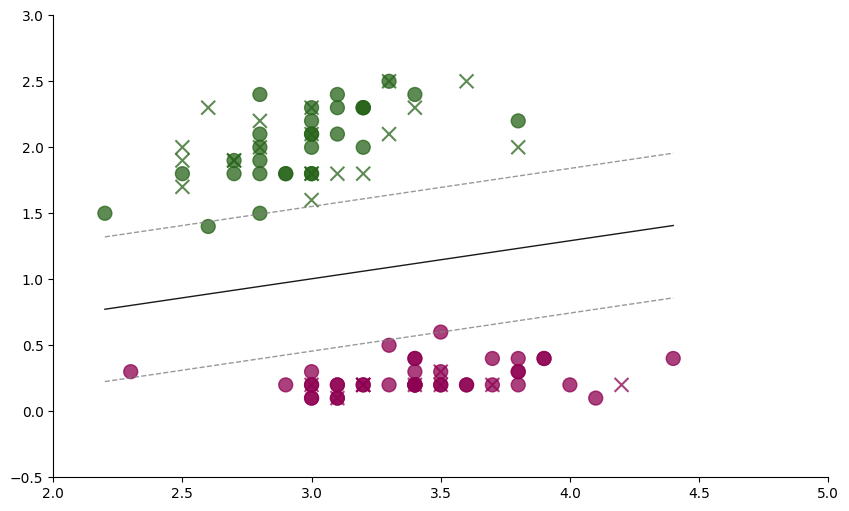

In [6]:
# Define the Support Vector Machine (SVM) Classifier
class SVM:
    # Initialize the SVM classifier with hyperparameters.
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate # Learning rate for weight updates
        self.lambda_param = lambda_param # Regularization parameter
        self.n_iters = n_iters # Number of training iterations
        self.w = None # Weight vector (to be initialized)
        self.b = None # Bias term (to be initialized)

    def _init_weights_bias(self, X):
        # Initialize weights and bias to zero.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        # Map the original class labels to {-1, 1} for SVM.
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        # Check if a given data point satisfies the SVM constraint.
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        # Compute gradients for weights and bias based on the constraint.
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        # Update the weights and bias using the computed gradients.
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        # Train the SVM classifier on the provided dataset.
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        # Predict class labels for the given feature matrix.
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

# hyperplane for plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]
    
# Set random seed for reproducibility
SEED = 1234
TRN_TST_SPLIT = 0.3
N_ITER = 2000

# Load and preprocess the dataset
X = binary_dataset[['sepal width', 'petal width']].to_numpy()
y = binary_dataset["class"].to_numpy()

print(X.shape) # Print shape of feature matrix
print(y.shape) # Print shape of class labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRN_TST_SPLIT, shuffle=True, random_state=SEED)

# Initialize and train the SVM classifier
clf = SVM(n_iters=N_ITER) # Create an instance of the SVM class
clf.fit(X_train, y_train) # Train the SVM on the training data

# Make predictions on the test set
predictions = clf.predict(X_test)

print("SVM Accuracy: ", accuracy(y_test, predictions))

# Plotting the decision boundary and data points
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# Set the colormap for scatter plot
plt.set_cmap('PiYG')

# Scatter plot for training data (sepal width vs. petal width)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)

# Scatter plot for testing data
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

# Define the range for the x-axis (sepal width) based on training data
x0_1 = np.amin(X_train[:, 0]) # Minimum sepal width
x0_2 = np.amax(X_train[:, 0]) # Maximum sepal width

# Calculate corresponding petal width (x1) values for the decision boundary
x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

# Calculate y-coordinates for the margin lines (offset = -1 and +1)
x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

# Plot the decision boundary
ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

# Set the limits for the y-axis (petal width) with some padding
x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

# Remove top and right spines for a cleaner look
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

# Set the axis limits to focus on the relevant data range
plt.axis([2,5,-0.5,3])

# Add legend to differentiate between training/test data and decision boundaries
plt.show()

Task 8

Both Perceptron and SVM serve the fundamental purpose of binary classification by finding a decision boundary that separates classes.

Perceptron offers a straightforward and computationally efficient method but struggles with optimal boundary alignment and is limited to linearly separable data.

SVM provides a more sophisticated mechanism by maximizing the margin, resulting in superior prediction accuracy and robustness, especially in complex or noisy datasets.
